在一切开始之前, 请完成基本操作的掌握. 了解[AI Studio基本操作1](https://aistudio.baidu.com/aistudio/projectdetail/39212) 和 [AI Studio基本操作2](https://aistudio.baidu.com/aistudio/projectdetail/69987)

然后大家再继续往下看

In [ ]:
# 安装beatifulSoup4
# beatifulSoup4是一个著名的爬虫框架

!pip install bs4

In [ ]:
# 安装openpyxl
# xlwt,xlrd是Python写Excel文件用的package. 
# 有严重的兼容性问题, 在windows上请尽量使用VSTO!! 在Python 3.5环境中可凑活使用openpyxl

!pip install openpyxl



In [32]:
#载入必要package

import sys
from bs4 import BeautifulSoup
import re
import urllib
import openpyxl
import time

In [2]:
url = 'https://movie.douban.com/top250?start=0'
'''
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)#取得响应
print(response.read())
'''
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
response = requests.get(url, headers=headers)
print(response.ok)

True


In [12]:
#定义一个方法, 获得页面全部内容

def askURL(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
        response = requests.get(url, headers=headers)
        html = response.text
    except requests.exceptions.HTTPError as e:
        print(e)
    return html

In [4]:

url = "https://movie.douban.com/top250?start=0"
txt = askURL(url)

<!DOCTYPE html>
<html lang="zh-CN" class="ua-windows ua-webkit">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>
豆瓣电影 Top 250
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    <link rel="apple-touch-icon" href="https://img3.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">
    <link href="https://img3.doubanio.com/f/shire/2feae483592bf2d2bd17a378097d4246ef1ebeaa/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img3.doubanio.com/f/shire/db02bd3a4c78de56425ddeedd748a6804af60ee9/css/separation/_all.css" rel="stylesheet" type="text/

In [ ]:
txt = '''
  <p class="">
                            导演: 罗伯特·泽米吉斯 Robert Zemeckis&nbsp;&nbsp;&nbsp;主演: 汤姆·汉克斯 Tom Hanks / ...<br>
                            1994&nbsp;/&nbsp;美国&nbsp;/&nbsp;剧情 爱情
                        </p>

'''

In [5]:
# fo = open('work/movie.txt','r',encoding='gb2312')
# txt = fo.read()
#print(txt)
findBd=re.compile(r'<p class="">(.*?)</p>',re.S)
link=re.findall(findBd,txt)
a = link[0]
print(a)
remove=re.compile(r'                            |\n|</br>|\.*')
a = re.sub(remove,"",a)
a=re.sub('<br(\s+)?\/?>(\s+)?'," ",a) #去掉<br >
a=re.sub('/', " ",a)#替换/
print(a.replace(" ",""))


                            导演: 弗兰克·德拉邦特 Frank Darabont&nbsp;&nbsp;&nbsp;主演: 蒂姆·罗宾斯 Tim Robbins /...<br>
                            1994&nbsp;/&nbsp;美国&nbsp;/&nbsp;犯罪 剧情
                        
导演:弗兰克·德拉邦特FrankDarabont&nbsp;&nbsp;&nbsp;主演:蒂姆·罗宾斯TimRobbins1994&nbsp;&nbsp;美国&nbsp;&nbsp;犯罪剧情


In [30]:
html = askURL('https://movie.douban.com/top250?start=')


In [106]:
def get_page_data(html):
    bs  = BeautifulSoup(html,"html.parser")
    bs.findAll(name='div',attrs={"class":"item"})
    data_list = []
    rid_special_character = re.compile(r'/|\n|&nbsp|\xa0|\\xa0|\u3000|\\u3000|\\u0020|\u0020|\t|\r')
    for item in bs.findAll(name='div',attrs={"class":"item"}):
        data = []
        pic=item.findAll(name='img')[0]['src']
        data.append(pic) # 添加图片地址

        #电影链接
        moive_link = item.find(name='div',attrs={'class':'hd'})
        moive_link = moive_link.find(name='a')['href']
        data.append(moive_link)

        #处理标题
        titles_tag=item.findAll(name='span',attrs={"class":"title"})#获取标题，有可能中文，有可能英文
        titles_dic ={}
        for i in range(len(titles_tag)):
            title = titles_tag[i].text
            if i == 0:
                titles_dic['chinese title']=rid_special_character.sub(' ',title).strip()
                
            else:
                titles_dic['other title'] = rid_special_character.sub(' ',title).strip()
        #获取其他的别名
        alias_title = item.findAll(name='span',attrs={"class":"other"})
        if len(alias_title) > 0:
            alias_title = rid_special_character.sub(' ',alias_title[0].text).strip()
        #data.append(titles_dic)
        if len(titles_dic) >1:
            data.append(titles_dic.get('chinese title'))
            data.append(titles_dic.get('other title'))
        else:
            data.append(titles_dic.get('chinese title'))
            data.append('无')
        data.append(alias_title)

        #下面开始处理演员信息
        actors_tag = item.findAll(name='p',attrs={"class":""})
        if len(actors_tag) > 0:
            actors = actors_tag[0].text
            data.append(rid_special_character.sub(' ',actors).strip())
        
        #下面开始处理评分信息
        scores_tag = item.find(name = 'div',attrs={'class':'star'})
        scores_tag = scores_tag.findAll(name='span')
        data.append(rid_special_character.sub(' ',scores_tag[1].text).strip())
        assess_num = rid_special_character.sub(' ',scores_tag[3].text).strip()
        data.append(re.sub('[^\d+]','',assess_num))

        #下面开始获取概况信息
        quote = item.find(name = 'span',attrs={'class':'inq'})
        if quote != None:
            data.append(rid_special_character.sub(' ',quote.text).strip())
        else:
            data.append('无')

        data_list.append(data)
    return data_list


In [37]:
def get_next_page(html):
    result = None
    bs  = BeautifulSoup(html,"html.parser")
    next_page = bs.find(name='link',attrs={'rel':'next'})
    if next_page != None:
        result = next_page['href']
    else:
        result = None
    
    return result

In [82]:
## 开始爬取
baseUrl = 'https://movie.douban.com/top250'
next_page  = True
next_url = '?start=0&filter='
moives_data = []
while next_page:
    html = askURL(baseUrl+next_url)
    data = get_page_data(html)
    next_page = get_next_page(html)
    if next_page != None:
        next_url = next_page
    else:
        next_page = False
    print(next_url)
    moives_data.extend(data)
    # time.sleep(2)### 为了防止请求过于频繁被豆瓣发现，爬取一页页面后休息5秒


?start=25&filter=
?start=50&filter=
?start=75&filter=
?start=100&filter=
?start=125&filter=
?start=150&filter=
?start=175&filter=
?start=200&filter=
?start=225&filter=
?start=225&filter=


In [84]:
#下面的代码集中对多余的空格进行处理，只保留一个空格
for i in range(len(moives_data)):
    for j in range(2,len(moives_data[i])):
        moives_data[i][j] = ' '.join(moives_data[i][j].split())

In [85]:
len(moives_data)

250

In [54]:
len(moives_data)

250

In [ ]:
#获取相关内容
#Warning: 解析页面的代码和页面结构强相关, 当页面html结构发生变化的时候必须同步升级, 否则当场作废

def getData(baseurl):
    findLink=re.compile(r'<a href="(.*?)">')#找到影片详情链接
    findImgSrc=re.compile(r'<img.*src="(.*?)"',re.S)#找到影片图片
    findTitle=re.compile(r'<span class="title">(.*)</span>')#找到片名
    #找到评分
    findRating=re.compile(r'<span class="rating_num" property="v:average">(.*)</span>')
    #找到评价人数
    findJudge=re.compile(r'<span>(\d*)人评价</span>')
    #找到概况
    findInq=re.compile(r'<span class="inq">(.*)</span>')
    #找到影片相关内容：导演，主演，年份，地区，类别
    findBd=re.compile(r'<p class="">(.*?)</p>',re.S)
    #去掉无关内容
    remove=re.compile(r'                            |\n|</br>|\.*')
    datalist=[]

    for i in range(0,10):
        url=baseurl+str(i*25)
        html=askURL(url)
        soup = BeautifulSoup(html, "html.parser")
        for item in soup.find_all('div',class_='item'):#找到每一个影片项
            data=[]
            item=str(item)#转换成字符串
            # 影片详情链接
            link=re.findall(findLink,item)[0]
            data.append(link)#添加详情链接  
            imgSrc=re.findall(findImgSrc,item)[0]
            data.append(imgSrc)#添加图片链接
            titles=re.findall(findTitle,item)
            #片名可能只有一个中文名，没有外国名
            if(len(titles)==2):
                ctitle=titles[0]
                data.append(ctitle)#添加中文片名
                otitle=titles[1].replace("/","")#去掉无关符号
                data.append(otitle)#添加外国片名
            else:
                data.append(titles[0])#添加中文片名
                data.append(' ')#留空

            rating=re.findall(findRating,item)[0]
            data.append(rating)#添加评分
            judgeNum=re.findall(findJudge,item)[0]
            data.append(judgeNum)#添加评论人数
            inq=re.findall(findInq,item)
            
            #可能没有概况
            if len(inq)!=0:
                inq=inq[0].replace("。","")#去掉句号
                data.append(inq)#添加概况
            else:
                data.append(' ')#留空
            bd=re.findall(findBd,item)[0]
            bd=re.sub(remove,"",bd)
            bd=re.sub('<br(\s+)?\/?>(\s+)?'," ",bd) #去掉<br >
            bd=re.sub('/', " ",bd)#替换/
            data.append(bd.strip())
            datalist.append(data)

    return datalist

In [87]:
#将相关数据写入excel中

def saveData(datalist,savepath,c):
    book=openpyxl.Workbook()
    book.create_sheet
    sheet = book.create_sheet("豆瓣电影Top250",0)
    #sheet=book.add_sheet('豆瓣电影Top250',cell_overwrite_ok=True)
    col=('电影详情链接','图片链接','影片中文名','影片外国名', '评分','评价数','概况','相关信息')
    col = c

    sheet.append(col)  #添加列头

    
    for i in range(0,len(datalist)):
        data=datalist[i]
        for j in range(0,len(datalist[0])):
            sheet.cell(row = (i+2),column = (j+1),value = data[j]) 

#openpyxl中的单元格计数从1开始, 加上第一行是列头, 要多跳一个
#openpyxl中的计数和Excel内的计数方式一致, 但和常规编程从0开始的方式相左

    book.save(savepath) #保存

In [96]:
def main():
    ## 开始爬取
    print('-----开始爬取-----')
    baseUrl = 'https://movie.douban.com/top250'
    next_page  = True
    next_url = '?start=0&filter='
    moives_data = []
    file_path ='work/豆瓣电影Top250.xlsx'
    while next_page:
        html = askURL(baseUrl+next_url)
        data = get_page_data(html)
        next_page = get_next_page(html)
        if next_page != None:
            next_url = next_page
        else:
            next_page = False
        print(next_url)
        moives_data.extend(data)
        # time.sleep(2)### 为了防止请求过于频繁被豆瓣发现，爬取一页页面后休息5秒
    saveData(moives_data,file_path,c=('图片链接','电影详情链接','中文名称','外文名称','其他名称','相关信息','评分','评价数量','概况'))
    print('爬取完毕，文件在',file_path)

In [107]:
main()

-----开始爬取-----
?start=25&filter=
?start=50&filter=
?start=75&filter=
?start=100&filter=
?start=125&filter=
?start=150&filter=
?start=175&filter=
?start=200&filter=
?start=225&filter=
?start=225&filter=
爬取完毕，文件在 work/豆瓣电影Top250.xlsx


**不要使用pandas来处理Excel文件, 因为还是依赖xlrd的. 请直接使用openpyxl**

xlrd/xlwt不能处理Excel 2007之后的格式, 也就是说最大一张数据表仅支持65535行. 

In [98]:
from pandas import Series,DataFrame
import pandas as pd

#打印一些样例数据观察

from openpyxl import load_workbook
wb = load_workbook(filename = 'work/豆瓣电影Top250.xlsx')
sheet_ranges = wb['豆瓣电影Top250']
df = DataFrame(sheet_ranges.values)

df

,0,1,2,3,4,5,6,7,8
0,图片链接,电影详情链接,中文名称,外文名称,其他名称,相关信息,评分,评价数量,概况
1,https://img2.doubanio.com/view/photo/s_ratio_p...,https://movie.douban.com/subject/1292052/,肖申克的救赎,The Shawshank Redemption,月黑高飞(港) 刺激1995(台),导演: 弗兰克·德拉邦特 Frank Darabont 主演: 蒂姆·罗宾斯 Tim R...,9.7,2468739人评价,希望让人自由。
2,https://img3.doubanio.com/view/photo/s_ratio_p...,https://movie.douban.com/subject/1291546/,霸王别姬,无,再见，我的妾 Farewell My Concubine,导演: 陈凯歌 Kaige Chen 主演: 张国荣 Leslie Cheung 张...,9.6,1835076人评价,风华绝代。
3,https://img2.doubanio.com/view/photo/s_ratio_p...,https://movie.douban.com/subject/1292720/,阿甘正传,Forrest Gump,福雷斯特·冈普,导演: 罗伯特·泽米吉斯 Robert Zemeckis 主演: 汤姆·汉克斯 Tom ...,9.5,1855296人评价,一部美国近现代史。
4,https://img2.doubanio.com/view/photo/s_ratio_p...,https://movie.douban.com/subject/1295644/,这个杀手不太冷,Léon,杀手莱昂 终极追杀令(台),导演: 吕克·贝松 Luc Besson 主演: 让·雷诺 Jean Reno 娜塔...,9.4,2019175人评价,怪蜀黍和小萝莉不得不说的故事。
...,...,...,...,...,...,...,...,...,...
246,https://img2.doubanio.com/view/photo/s_ratio_p...,https://movie.douban.com/subject/2297265/,浪潮,Die Welle,恶魔教室(台) 白恤暴潮(港),导演: 丹尼斯·甘塞尔 Dennis Gansel 主演: 尤尔根·沃格尔 Jürgen...,8.7,236210人评价,世界离独裁只有五天。
247,https://img9.doubanio.com/view/photo/s_ratio_p...,https://movie.douban.com/subject/26393561/,小萝莉的猴神大叔,Bajrangi Bhaijaan,娃娃返乡任务(台) 宝莱坞之钢铁奶爸(台),导演: 卡比尔·汗 Kabir Khan 主演: 萨尔曼·汗 Salman Khan ...,8.4,427865人评价,宝莱坞的萝莉与大叔。
248,https://img2.doubanio.com/view/photo/s_ratio_p...,https://movie.douban.com/subject/25864085/,火星救援,The Martian,火星任务(港) 绝地救援(台),导演: 雷德利·斯科特 Ridley Scott 主演: 马特·达蒙 Matt Damo...,8.5,598770人评价,无
249,https://img1.doubanio.com/view/photo/s_ratio_p...,https://movie.douban.com/subject/1292528/,猜火车,Trainspotting,迷幻列车(港) 定位的火车,导演: 丹尼·博伊尔 Danny Boyle 主演: 伊万·麦克格雷格 Ewan McG...,8.5,372519人评价,不可猜的青春迷笛。


In [99]:
from pandas import Series,DataFrame
import pandas as pd

#打印一些样例数据观察

from openpyxl import load_workbook
wb = load_workbook(filename = 'work/豆瓣电影Top250.xlsx')
sheet_ranges = wb['豆瓣电影Top250']

#将第一列的前几行打印出来
for i in range (1,8):
    print(sheet_ranges['A'+i.__str__()].value)
    

#如果没有问题, 就将该工作表转为dataframe格式

df = DataFrame(sheet_ranges.values)
df[4].values[1:]

图片链接
https://img2.doubanio.com/view/photo/s_ratio_poster/public/p480747492.jpg
https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2561716440.jpg
https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2372307693.jpg
https://img2.doubanio.com/view/photo/s_ratio_poster/public/p511118051.jpg
https://img9.doubanio.com/view/photo/s_ratio_poster/public/p457760035.jpg
https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2578474613.jpg


array(['月黑高飞(港)     刺激1995(台)', '再见，我的妾     Farewell My Concubine',
       '福雷斯特·冈普', '杀手莱昂     终极追杀令(台)', '铁达尼号(港   台)',
       '一个快乐的传说(港)     Life Is Beautiful', '神隐少女(台)     千与千寻的神隐',
       '舒特拉的名单(港)     辛德勒名单', '潜行凶间(港)     全面启动(台)',
       '秋田犬八千(港)     忠犬小八(台)', '星际启示录(港)     星际效应(台)',
       '真人Show(港)     真人戏', '声光伴我飞(港)     一九零零的传奇',
       '三个傻瓜(台)     作死不离3兄弟(港)', '太空奇兵·威E(港)     瓦力(台)',
       '歌声伴我心(港)     唱诗班男孩', 'Infernal Affairs     Mou gaan dou',
       '优兽大都会(港)     动物方城市(台)', '西游记完结篇仙履奇缘     齐天大圣西游记',
       '无声呐喊(港)     漩涡', "Mario Puzo's The Godfather",
       '寻找快乐的故事(港)     追求快乐', '邻居托托罗     邻家的豆豆龙', '萌动青春     青春萌动',
       '雄才伟略     情妇', '闪亮人生(港)     逆转人生(台)', '末代皇帝溥仪(港)',
       '蝙蝠侠前传2：黑暗骑士     黑暗骑士(台)', '玩转极乐园(港)     可可夜总会(台)',
       '人生     Lifetimes', '魔戒三部曲：王者再临(台   港)', '哈利波特1：神秘的魔法石(港   台)',
       '飘', '迦百农     星仔打官司(港)', '许愿     希望：为爱重生(台)',
       '冲天救兵(港)     天外奇迹(台)', '我和我的冠军女儿(台)     打死不离3父女(港)',
       '12怒汉     十二怒汉', '哈尔移动城堡(港)     霍尔的移动城堡(台

然后可以在左侧"文件夹"中, 找到生成的Excel文件, 并将该文件下载至本地, 进行进一步处理.

![](https://ai-studio-static-online.cdn.bcebos.com/bd178119c0644fc5a8d049ed8e8f11578a94a456e5244f09b83f983e982c57da)

打开可以看到内容, 再对评分和评价数进行统计分析

![](https://ai-studio-static-online.cdn.bcebos.com/c2488d2d526e44dd953f382286163ec105cc7079ab124a22971d5faba49e7592)

比如可以进行散点图或者直方图统计分析

In [101]:
pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/59/ea/1c00d9278c51d5f03276ac3f08773a13d93cbf2d722386ae8da083866697/matplotlib-3.4.3-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/20/ec/15a263f2c65d71cf62aa767f774c2381077e07beb1e9309a94461ec1cd29/Pillow-8.4.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/04/9d/4ccf8ad52441787ed4ae97132f62dc52ce6556406d4b5a7128f00a15511d/kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\python高级程序设计\Python入门-豆瓣电影爬取\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


(array([ 1.,  3.,  4.,  6., 20., 15., 28., 17., 37., 40., 41., 23., 11.,
         3.,  1.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <BarContainer object of 15 artists>)

d:\python高级程序设计\Python入门-豆瓣电影爬取\.venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python高级程序设计\Python入门-豆瓣电影爬取\.venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python高级程序设计\Python入门-豆瓣电影爬取\.venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25490 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python高级程序设计\Python入门-豆瓣电影爬取\.venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python高级程序设计\Python入门-豆瓣电影爬取\.venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35780 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\python高级程序设计\Python入门-豆瓣电影爬取\.venv\lib\site-packages\matplo

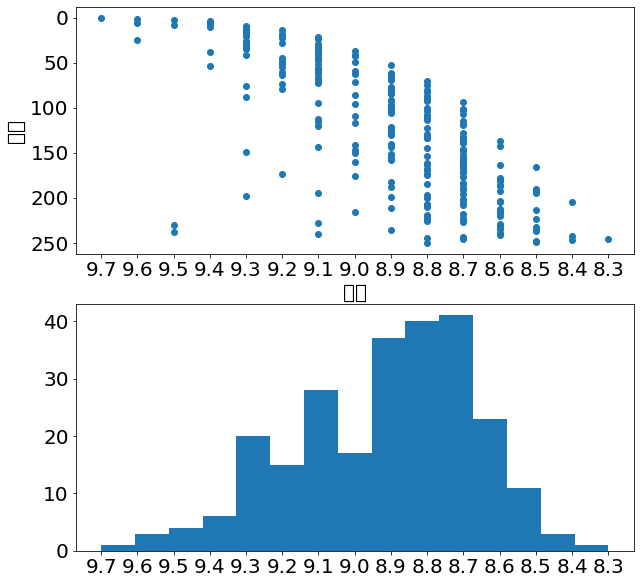

In [108]:
import matplotlib.pyplot as plt
import matplotlib
#配置中文字体和修改字体大小
ratings = list(df[6].values[1:])
matplotlib.rcParams['font.size']=20
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.scatter(ratings,range(1,251))
plt.xlabel('评分')
plt.ylabel('排名')
#修改y轴为倒序
plt.gca().invert_yaxis()
plt.subplot(2,1,2)
plt.hist(ratings,bins=15)